<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-информации" data-toc-modified-id="Подготовка-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка информации</a></span></li><li><span><a href="#Импорт-данных" data-toc-modified-id="Импорт-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт данных</a></span></li><li><span><a href="#Распределение-полетов-по-городам" data-toc-modified-id="Распределение-полетов-по-городам-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Распределение полетов по городам</a></span></li><li><span><a href="#Распределение-числа-полетов-среди-моделей-самолетов" data-toc-modified-id="Распределение-числа-полетов-среди-моделей-самолетов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Распределение числа полетов среди моделей самолетов</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v.1" data-toc-modified-id="Комментарий-от-ревьюера-v.1-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Комментарий от ревьюера v.1</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v.2" data-toc-modified-id="Комментарий-от-ревьюера-v.2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Комментарий от ревьюера v.2</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Российская авиакомпания F9 выполняет внутренние пассажирские перевозки. Для развития компании важно понять предпочтения пользователей, покупающих билеты на разные направления.


Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали

## Подготовка информации

По итогам предварительного анализа сформированы базы данных, 
содержащие информацию о модели самолета и количестве рейсов для каждой модели самолетов в сентябре 2018 года и о среднем количестве рейсов, прибывающих в город за день в августе 2018 года

## Импорт данных

In [1]:
import pandas as pd #  Импортируем библиотеку для работы с базами данных 
import matplotlib.pyplot as plt #  Импортируем библиотеку для построения графической информации
import seaborn as sns

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера v.2 <a class="tocSkip">

Отлично!
    
</div>
    
---

In [2]:
df_model = pd.read_csv('/datasets/query_1.csv') # загружаем данные о моделях самолетов
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
df_model.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


В таблице представлено 8 моделей самолетов; дубликаты, пропуски отсутствуют

In [4]:
df_city = pd.read_csv('/datasets/query_3.csv') # загружаем данные о перелетах в населенные пункты
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
df_city.city.str.lower().value_counts().sum()

101

Таблица содержит сведения о полетах в отношении 101 населенного пункта; дубликаты и пропуски отсутствуют

## Распределение полетов по городам

In [6]:
df_city_sorted = df_city.sort_values(by = 'average_flights', ascending = False) # отсортируем города по количеству перелетов
df_city_sorted

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
...,...,...
22,Ижевск,1.000000
65,Петропавловск-Камчатский,1.000000
31,Комсомольск-на-Амуре,1.000000
58,Нягань,1.000000


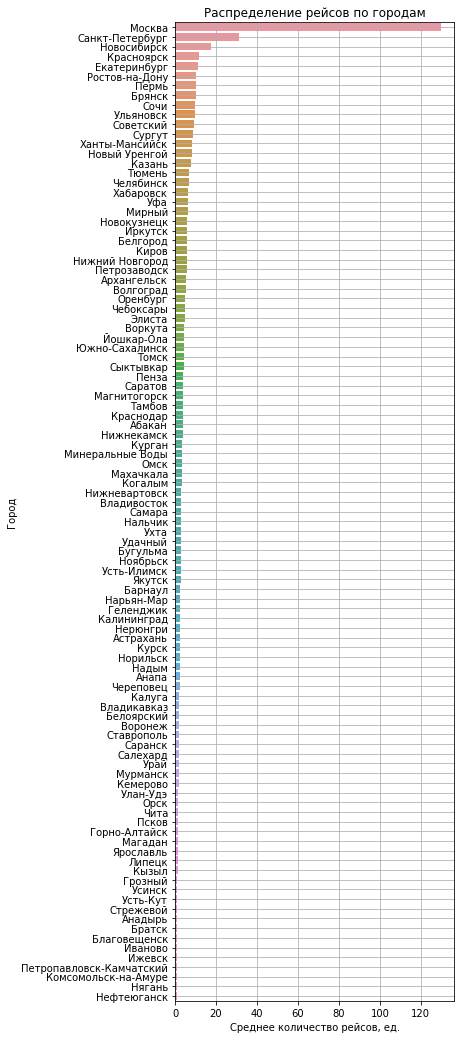

In [7]:
plt.figure(figsize=(5, 18))
barplot = sns.barplot(x='average_flights', 
            y='city', 
            data=df_city_sorted, 
            )
barplot.set_title('Распределение рейсов по городам')
barplot.set_ylabel('Город')
barplot.set_xlabel('Среднее количество рейсов, ед.')
barplot.grid()
 
plt.show()

Наибольшее количество полетов совершается в крупнейшие города по количеству населения, а также узловые аэропорты авиакомпаний

In [8]:
df_city.sort_values(by = 'average_flights', ascending = False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


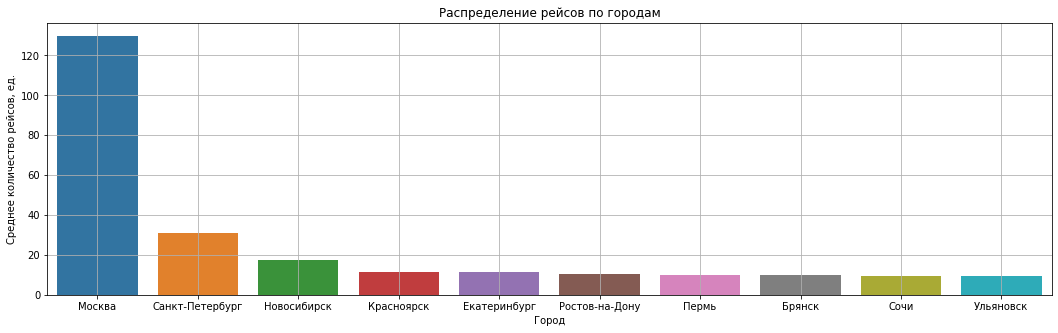

In [9]:
plt.figure(figsize=(18, 5))
barplot = sns.barplot(x='city', 
            y='average_flights', 
            data=df_city.sort_values(by = 'average_flights', ascending = False).head(10), 
            )
barplot.set_title('Распределение рейсов по городам')
barplot.set_xlabel('Город')
barplot.set_ylabel('Среднее количество рейсов, ед.')
barplot.grid()
plt.show()

Москва значительно опережает другие города по количеству полетов, в первую очередь за счетов большего числа аэропортов

## Распределение числа полетов среди моделей самолетов

In [10]:
df_model.sort_values(by = 'flights_amount', ascending = False)

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


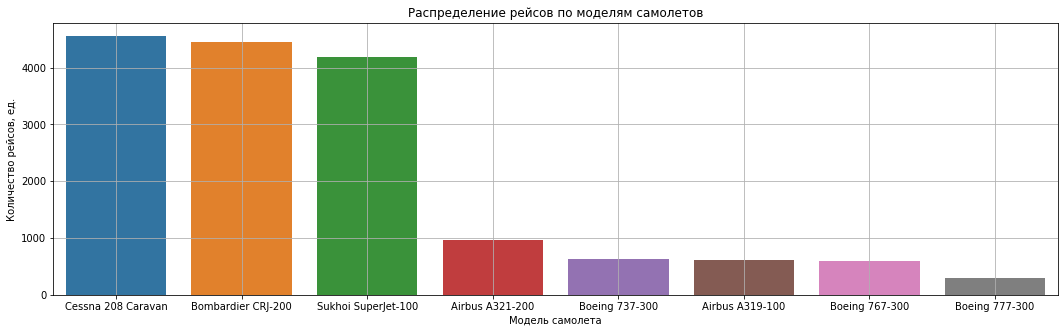

In [11]:
plt.figure(figsize=(18, 5))
barplot = sns.barplot(x='model', 
            y='flights_amount', 
            data=df_model.sort_values(by = 'flights_amount', ascending = False) 
            )
barplot.set_title('Распределение рейсов по моделям самолетов')
barplot.set_xlabel('Модель самолета')
barplot.set_ylabel('Количество рейсов, ед.')
barplot.grid()
plt.show()

Данные показывают, что значительное число полетов совершается частной бизнес-авиацией, полеты совершаются на короткие расстояния. Данные в отношении Sukhoi SuperJet-100 требуют дополнительного исследования - значительно выделяется среди пассажирских самолетов гражданской авиации. 

# Выводы

В проекте на основе данных об авиаперелетов в 2018 года исследовалось влияние проходящих музыкальных фестивалей на спрос на авиабилеты. На примере московских фестивалей в период с 27 июля по 30 сентября рост спроса на билеты в Москву не зафиксирован.

Вне зависимости от событийного туризма основная доля перелетов по стране организована через московские авиаузлы, далее со значительным отставанием следуют домашние аэропорты крупных российских авиакомпаний, города-миллионники, кроме того значительную часть перелетов составляет частная бизнес-авиация